<img src="https://www.usergioarboleda.edu.co/wp-content/uploads/ultimatum/imagens/logo-mobile-UniversidadSergioArboleda.png" alt="USA" width=700>

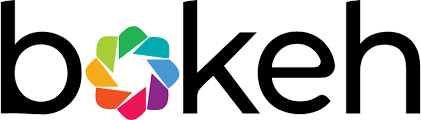

In [8]:
!pip install bokeh

In [9]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [11]:
import bokeh.sampledata
bokeh.sampledata.download()

Using data directory: C:\Users\user\.bokeh\data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3171836 bytes)
   3171836 [100.00%]
Unpacking: US_Counties.csv
Downloading: us_cities.json (713565 bytes)
    713565 [100.00%]
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (4816256 bytes)
   4816256 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv
Downloading: gapminder_fertility.csv (64346 bytes)
     64346 [100.00%]
Downloading: gapminder_population.csv (94509 bytes)
     94509 [100.00%]
Downloading: gapminder_life_expectancy.csv (73243 bytes)
     73243 [100.00%]
Downloading:

# Diagramas de Dispersion

Bokeh puede dibujar muchos tipos de formas visuales (llamadas **glifos**), incluidas líneas, barras, parches, mosaicos hexagonales y más. Una de las tareas de visualización más comunes es dibujar un diagrama de dispersión de datos utilizando pequeños glifos *marcadores* para representar cada punto.

En general, es necesario:
* Crear un lienzo en blanco: `p = figure(...)`
* llamar el metodo de la figura `p.circle` 
* `show` la figura

In [13]:
output_notebook()
p = figure(plot_width=400, plot_height=400)

p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=15, line_color="navy", fill_color="orange", fill_alpha=0.5)
show(p)

Loading BokehJS ...

In [14]:
p = figure(plot_width=400, plot_height=400)
p.square([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=[10, 15, 20, 25, 30], color="firebrick", alpha=0.6)
show(p)

La siguiente es la lista de glifos disponible

* [asterisk()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.asterisk)
* [circle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle)
* [circle_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_cross)
* [circle_x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.circle_x)
* [cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.cross)
* [diamond()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond)
* [diamond_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.diamond_cross)
* [hex()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.hex)
* [inverted_triangle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.inverted_triangle)
* [square()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square)
* [square_cross()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_cross)
* [square_x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.square_x)
* [triangle()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.triangle)
* [x()](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.x)

# Diagramas de Linea

In [16]:
p = figure(plot_width=400, plot_height=400, title="")
p.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=2)
show(p)

Existen opciones para `line_width`, `line_color` o `line_dash`. Intente cambiar [las propiedades de la linea](https://bokeh.pydata.org/en/latest/docs/reference/plotting.html#bokeh.plotting.figure.Figure.line)

### Ejes de fecha

In [18]:
from bokeh.sampledata.glucose import data
data.head()

,isig,glucose
datetime,,
2010-03-24 09:51:00,22.59,258
2010-03-24 09:56:00,22.52,260
2010-03-24 10:01:00,22.23,258
2010-03-24 10:06:00,21.56,254
2010-03-24 10:11:00,20.79,246


In [20]:
# reduce data size to one week
week = data.loc['2010-10-01':'2010-10-08']

p = figure(x_axis_type="datetime", title="Glucosa", plot_height=350, plot_width=800)
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Glucosa'

p.line(week.index, week.glucose)

show(p)

# Matrices hexagonales

In [21]:
from bokeh.palettes import Viridis256
from bokeh.util.hex import hexbin

n = 50000
x = np.random.standard_normal(n)
y = np.random.standard_normal(n)

bins = hexbin(x, y, 0.1)

# color map the bins by hand, will see how to use linear_cmap later
color = [Viridis256[int(i)] for i in bins.counts/max(bins.counts)*255]

# match_aspect ensures neither dimension is squished, regardless of the plot size
p = figure(tools="wheel_zoom,reset", match_aspect=True, background_fill_color='#440154')
p.grid.visible = False

p.hex_tile(bins.q, bins.r, size=0.1, line_color=None, fill_color=color)

show(p)

## Diagramas de Barras

In [24]:
fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']

p = figure(x_range=fruits, plot_height=250, title="Fruit Counts")

p.vbar(x=fruits, top=[5, 3, 4, 2, 4, 6], width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

## Barras Apiladas

In [30]:
from bokeh.palettes import GnBu3, OrRd3

years = ['2015', '2016', '2017']

exports = {'fruits' : fruits,
           '2015'   : [2, 1, 4, 3, 2, 4],
           '2016'   : [5, 3, 4, 2, 4, 6],
           '2017'   : [3, 2, 4, 4, 5, 3]}
imports = {'fruits' : fruits,
           '2015'   : [-1, 0, -1, -3, -2, -1],
           '2016'   : [-2, -1, -3, -1, -2, -2],
           '2017'   : [-1, -2, -1, 0, -2, -2]}

p = figure(y_range=fruits, plot_height=250, x_range=(-16, 16), title="Importacion Anual")

p.hbar_stack(years, y='fruits', height=0.9, color=GnBu3, source=ColumnDataSource(exports))

p.hbar_stack(years, y='fruits', height=0.9, color=OrRd3, source=ColumnDataSource(imports))

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.location = "center_left"

show(p)

## Barras Agrupadas

In [32]:
from bokeh.models import FactorRange

fruits = ['Apples', 'Pears', 'Nectarines', 'Plums', 'Grapes', 'Strawberries']
years = ['2015', '2016', '2017']

data = {'fruits' : fruits,
        '2015'   : [2, 1, 4, 3, 2, 4],
        '2016'   : [5, 3, 3, 2, 4, 6],
        '2017'   : [3, 2, 4, 4, 5, 3]}

# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (fruit, year) for fruit in fruits for year in years ]
counts = sum(zip(data['2015'], data['2016'], data['2017']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=250, title="Conteo Anual")

p.vbar(x='x', top='counts', width=0.9, source=source)

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)